In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from myst_nb import glue
import numpy as np
import psutil
import numpy
from memory_profiler import profile

In [2]:
x, y = symbols('x y')
equations = pd.read_csv("eq.csv")

In [3]:
# Initialising vectors to store the result for maxima benchmarking
vctr = np.array(equations[0:])
time_measure = []
lenght_expr = []
memory_measure = []
resultant_length = []
resultant_eq = []
accuracy = []

In [4]:
# Autometed test script for Maxima benchmarking
import time
%load_ext memory_profiler
arr = []

# Time measure bench marking
def time_banch():
    start = time.time()
    %run ./Maxima_CAS.ipynb
    end = time.time()
    result = (start-end)*(-1)
    return result

# Memory measure benchmarking (Flowed)
def memory_usage():
    memo = psutil.Process().memory_info().rss / (1024 * 1024)
    print(memo)
    memory_measure.append(str(memo))
    %run ./Maxima_CAS.ipynb

# main function/loop that loops through each data point
for i in range(0, len(vctr)):
    data = vctr[i][0]
    %store data
    %run ./Maxima_CAS.ipynb
    arr = np.zeros((1024, 1024, 1024, 3), dtype=np.uint8)
    memory_usage()
    print(ans)
    resultant_eq.append(ans)
    resultant_length.append(len(str(ans)))
    time_result = time_banch()
    time_measure.append(time_result)
    lenght_expr.append(len(vctr[i][0]))
    del data

Stored 'data' (str)
172.9375
x**2 + 2*x + 1
Stored 'data' (str)
173.12890625
x - 1
Stored 'data' (str)
173.19921875
x**3 + x**2 - x - 2
Stored 'data' (str)
173.31640625
(-4*x**2 - 3*x - 6)/(x**3 - 5*x**2 - 6*x) - 4
Stored 'data' (str)
173.3984375
1/3 - 1/(6*x)
Stored 'data' (str)
173.5078125
x/2 + 3/2 + 9/(2*x)
Stored 'data' (str)
173.5625
x/3
Stored 'data' (str)
173.59765625
3*x**3/(2*x**4 + 24*x**3 + 76*x**2 + 48*x + 144)
Stored 'data' (str)
173.65625
1 + 2/(x - 6)
Stored 'data' (str)
173.94140625
8*sqrt(5)*x**(7/2) + 10*sqrt(5)*x*sqrt(x**2) + 16*sqrt(5)*x*sqrt(x**4)
Stored 'data' (str)
174.0390625
(x - 6)/(6*x**2 + 33*x + 36) + 3/2
Stored 'data' (str)
174.109375
(x - 5)/(5*x**2 - 9*x + 4) + 3/5
Stored 'data' (str)
174.171875
(89 - 7*x)/(x**2 - 4*x - 21) + 1
Stored 'data' (str)
174.19921875
(x - 6)/(6*x**2 + 33*x + 36) + 3/2
Stored 'data' (str)
174.25390625
(20 - x)/(2*x**2 - 3*x - 20) + 1
Stored 'data' (str)
174.31640625
sin(x)
Stored 'data' (str)
174.34375
sin(x)*tan(x) + cos(x)
St

In [5]:
# Autometed test script to benchmark Sympy
import time

# Lists to store the rults
vctr = np.array(equations[0:])
lenght_expr_sp = []
resultent_eq_sp = []
time_measure_sp = []
accuracy_sp = []
memory_measure_sp = []
resultant_length_sp = []

# Memory usage benchmark (Flowed)
def memory_usage_sp(expression):
    
    smpExp = simplify(expression)
    memo = psutil.Process().memory_info().rss / (1024 * 1024)
    memory_measure_sp.append(str(memo))
    
# Measureing the runtime 
def time_banch_sp(expression):
    start = time.time()
    expri = expression
    smpExp = simplify(expri)
    end = time.time()
    result = (start-end)*(-1)
    return result

# the main for loop for processing each equation in the dataset 
for i in range(0, len(vctr)):
    expression = vctr[i][0]
    _expr = simplify(expression)
    resultent_eq_sp.append(_expr)
    resultant_length_sp.append(len(str(_expr)))
    result = time_banch_sp(expression)
    time_measure_sp.append(result)
    memory_usage_sp(expression)
    lenght_expr_sp.append(len(vctr[i][0]))


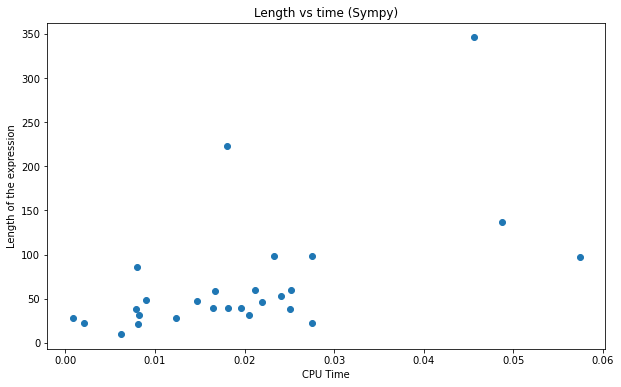

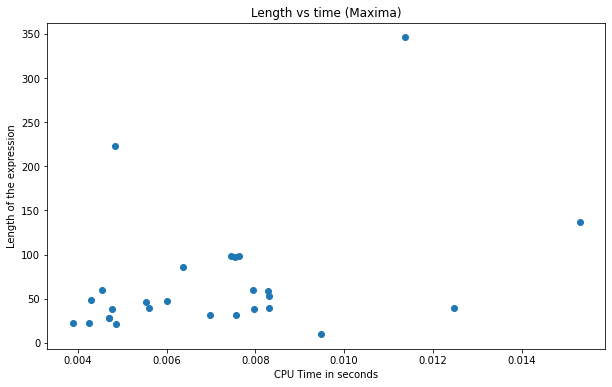

In [6]:
# Ploting the graphs for Length vs time for Sympy and Maxima
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot for length vs accuracy
ax.scatter(time_measure_sp, lenght_expr_sp)
ax.set(title = "Length vs time (Sympy)",
       xlabel = "CPU Time",
       ylabel = "Length of the expression")

# Ploting the graphs
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot for length vs accuracy
ax.scatter(time_measure, lenght_expr)
ax.set(title = "Length vs time (Maxima)",
       xlabel = "CPU Time in seconds",
       ylabel = "Length of the expression")

plt.show()

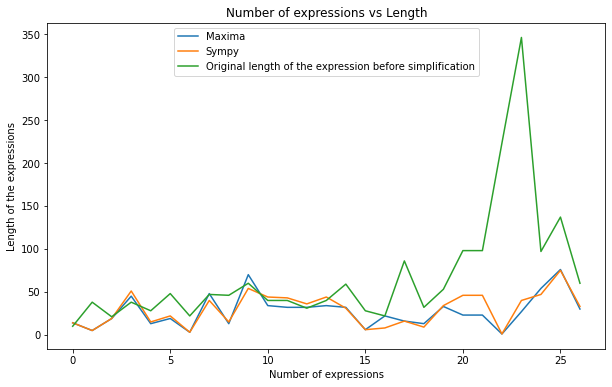

In [7]:
# Creating the graph for the resultant length
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(resultant_length, label="Maxima")
ax.plot(resultant_length_sp, label="Sympy")
ax.plot(lenght_expr, label="Original length of the expression before simplification")

ax.set(title = "Number of expressions vs Length",
       xlabel = "Number of expressions",
       ylabel = "Length of the expressions")
leg = plt.legend(loc='upper center')
plt.show()

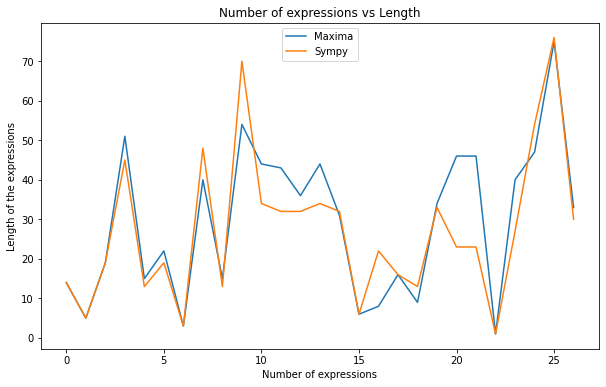

In [8]:
# Creating the graph for the resultant length (without including original length)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(resultant_length_sp, label="Maxima")
ax.plot(resultant_length, label="Sympy")

ax.set(title = "Number of expressions vs Length",
       xlabel = "Number of expressions",
       ylabel = "Length of the expressions")
leg = plt.legend(loc='upper center')
plt.show()

In [9]:
mean_maxima = np.mean(resultant_length)
print(mean_maxima)

27.296296296296298


In [10]:
mean_sp = np.mean(resultant_length_sp)
print(mean_sp)

29.51851851851852


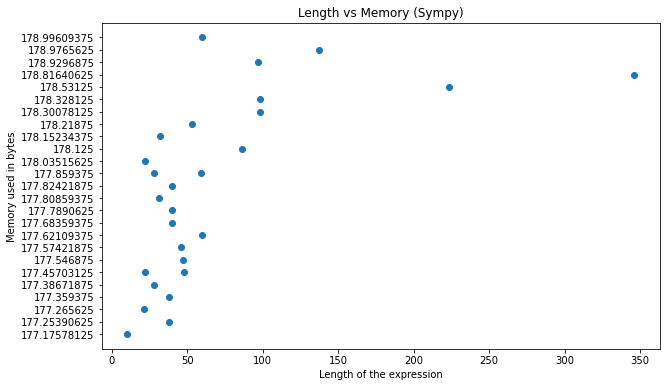

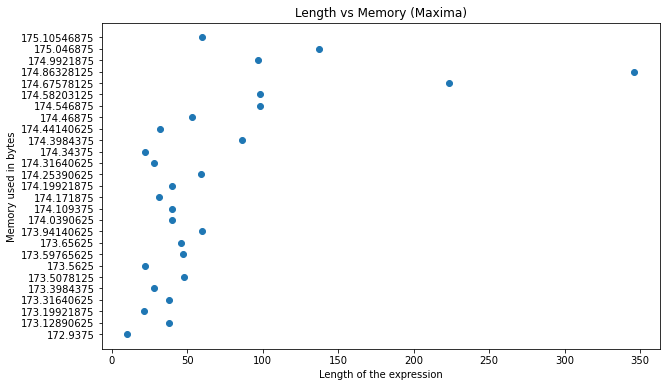

In [11]:
# Ploting the graphs
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot for length vs accuracy
ax.scatter(lenght_expr_sp, memory_measure_sp)
ax.set(title = "Length vs Memory (Sympy)",
       xlabel = "Length of the expression",
       ylabel = "Memory used in bytes")

# Ploting the graphs
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot for length vs accuracy
ax.scatter(lenght_expr, memory_measure)
ax.set(title = "Length vs Memory (Maxima)",
       xlabel = "Length of the expression",
       ylabel = "Memory used in bytes")

plt.show()